# Digital Earth Africa EO coding task

# Michael Wellington

* **Products used: Landsat-5, 7, and 8** 
[ls8_sr](https://explorer.digitalearth.africa/ls8_sr),
[ls7_sr](https://explorer.digitalearth.africa/ls7_sr),
[ls5_sr](https://explorer.digitalearth.africa/ls5_sr)

## Description
This notebook describes how to fulfil the DE Africa EO coding task. It is organised under the following headings:

1. Load Landsat data for defined area
2. Calculate NDVI
3. Resample to annual NDVI
4. Plot annual NDVI

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [20]:
%matplotlib inline

import datacube
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from deafrica_tools.datahandling import load_ard
from deafrica_tools.plotting import rgb, display_map
from deafrica_tools.bandindices import calculate_indices

### Connect to the datacube

Connect to the datacube so we can access DE Africa data.

In [2]:
dc = datacube.Datacube(app='DEAfrica_coding')

## 1. Load Landsat data for defined area

### Set data collection parameters

The query dictionary below defines our area of interest, satellite products, relevant bands, and epoch.

In [ ]:
lon_range = (-16.56, -16.52)
lat_range = (13.92, 13.96) 
query = {
    'x': (-16.56, -16.52),
    'y': (13.92, 13.96),
    'time': ('2018-01-01', '2020-12-31'),
    'measurements': ['red', 'green', 'blue', 'nir'], # Calculation of NDVI needs NIR band, so include this in addition to RGB.
    'group_by': 'solar_day',
    'output_crs' : 'epsg:6933',
}

### Inspect area of interest on a map

In [13]:
display_map(x=lon_range, y=lat_range)

### Load data

Load available data from Landsat 5, 7, and 8. Note that load_ard (analysis ready data) applies pixel quality (cloud) masking.

In [10]:
ds = load_ard(dc=dc, 
              products=['ls5_sr',
                        'ls7_sr',
                        'ls8_sr'],
              resolution=(-30, 30),
              **query)

# Print output data
print(ds)

Using pixel quality parameters for USGS Collection 2
Finding datasets
    ls5_sr
    ls7_sr
    ls8_sr
Applying pixel quality/cloud mask
Re-scaling Landsat C2 data
Loading 129 time steps
<xarray.Dataset>
Dimensions:      (time: 129, x: 130, y: 166)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-08T11:29:32.066562 ... 2020-12...
  * y            (y) float64 1.764e+06 1.764e+06 ... 1.759e+06 1.759e+06
  * x            (x) float64 -1.598e+06 -1.598e+06 ... -1.594e+06 -1.594e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 0.044255003 0.044255003 ... 0.033172503
    green        (time, y, x) float32 0.043815 0.043815 ... 0.0362525 0.0362525
    blue         (time, y, x) float32 0.029624999 0.032594994 ... 0.038232505
    nir          (time, y, x) float32 0.1602775 0.18087499 ... 0.029019997
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


### Check true-colour image of data

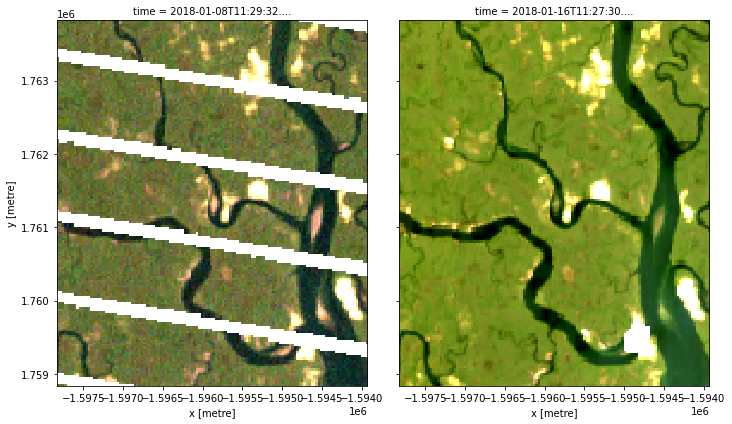

In [23]:
rgb(ds, index=[0,1]) # Inspect first two timesteps, note 0 indexing in Python

## 2. Calculate NDVI

We will use the 'calculate_indices' function to calculate NDVI on our dataset.


In [21]:
# We need to use collection='c2' because this data is Landsat collection 2
ds_ndvi = calculate_indices(ds, index='NDVI', collection='c2')

### Inspect first timestep of NDVI

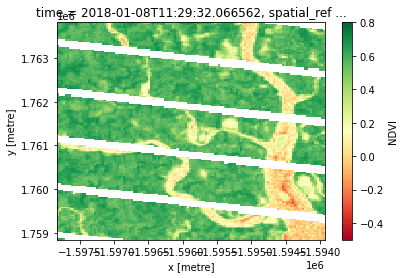

In [25]:
first_timestep = ds_ndvi.NDVI.isel(time=0)
first_timestep.plot(vmin=-0.50, vmax=0.8, cmap='RdYlGn')

## 3. Resample to annual NDVI

In [29]:
ds_ndvi_annual = ds_ndvi.groupby('time.year').mean(dim='time')
print(ds_ndvi_annual)

<xarray.Dataset>
Dimensions:      (x: 130, y: 166, year: 3)
Coordinates:
  * y            (y) float64 1.764e+06 1.764e+06 ... 1.759e+06 1.759e+06
  * x            (x) float64 -1.598e+06 -1.598e+06 ... -1.594e+06 -1.594e+06
    spatial_ref  int32 6933
  * year         (year) int64 2018 2019 2020
Data variables:
    red          (year, y, x) float32 0.06059946 0.06313976 ... 0.06301375
    green        (year, y, x) float32 0.06258891 0.065780625 ... 0.064509995
    blue         (year, y, x) float32 0.04060179 0.042870548 ... 0.049042497
    nir          (year, y, x) float32 0.18122734 0.20164523 ... 0.0725725
    NDVI         (year, y, x) float32 0.500977 0.52598745 ... 0.02009423


## 4. Plot annual NDVI

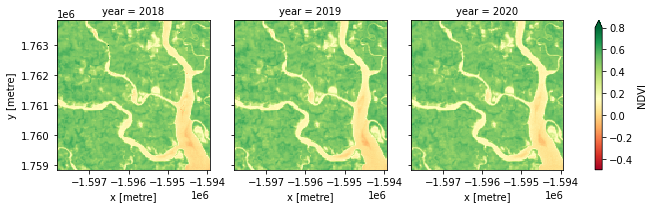

In [36]:
ds_ndvi_annual.NDVI.plot(vmin=-0.50, vmax=0.8, cmap='RdYlGn', col='year')

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [7]:
print(datacube.__version__)

1.8.4.dev52+g07bc51a5


**Last Tested:**

In [8]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2021-03-02'